In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
adults = pd.read_csv('../Data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
    )
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adults['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

# 4) Manipulate and pivot the data so that you can answer the following with clear and precise presentation

In [4]:
# Rank each occupation in terms of most likely to earn more than $50k

income = adults[['occupation', 'income']][adults['income'] == '>50K'].groupby('occupation').count()
income

,income
occupation,
?,191
Adm-clerical,507
Armed-Forces,1
Craft-repair,929
Exec-managerial,1968
Farming-fishing,115
Handlers-cleaners,86
Machine-op-inspct,250
Other-service,137


In [53]:
# Calculate the median age of people who make more and less than $50k. 

adults[['age','income']].groupby('income').median()

,age
income,
<=50K,34
>50K,44


In [54]:
# Calculate the medians for each again,
# but now split apart by the sex of the adults

adults[['age', 'income','sex']].groupby(['sex','income']).median()  


age
sex    income     
Female <=50K    34
       >50K     41
Male   <=50K    35
       >50K     44

In [8]:
# Calculate the mean and median number of years of education held by adults who make more and less than $50k.

# MEDIAN

median = adults[['education-num', 'income']].groupby('income').median()
median

,education-num
income,
<=50K,9
>50K,12


In [9]:
# MEAN

mean = adults[['education-num', 'income']].groupby('income').mean()
mean

,education-num
income,
<=50K,9.595065
>50K,11.611657


In [10]:
# Plot a histogram to see the distribution of years of school held by adults who make more and
# less than $50k. Do the same, but differentiating between various attributes (e.g. what does the
# histogram look like if we separate by other attributes such as gender, age 

age_education_income = adults[['age', 'education-num', 'income']]
mo_money = age_education_income[adults['income'] == '>50K']
no_money = age_education_income[adults['income'] == '<=50K']


Text(0, 0.5, '# of people')

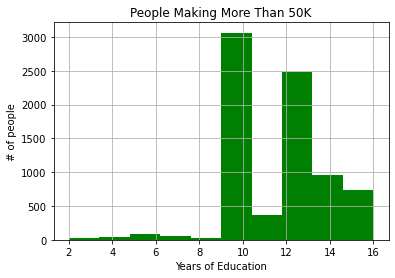

In [11]:
# Histogram of adults making more than 50k by education
mo_money['education-num'].hist(color = 'green')
plt.title('People Making More Than 50K')
plt.xlabel('Years of Education')
plt.ylabel('# of people')

Text(0, 0.5, '# of People')

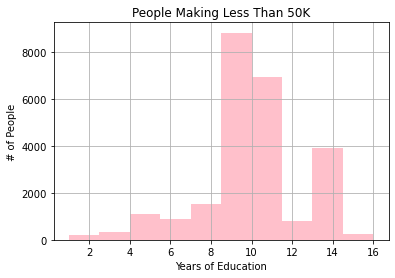

In [12]:
# Histogram of adults making less than 50k by education
no_money['education-num'].hist(color = 'pink')
plt.title('People Making Less Than 50K')
plt.xlabel('Years of Education')
plt.ylabel('# of People')

Text(0, 0.5, '# of People')

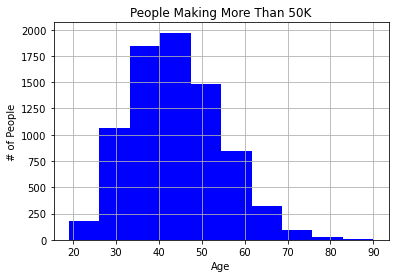

In [13]:
# Histogram of adults making more than 50k by age
mo_money['age'].hist(color = 'blue')
plt.title('People Making More Than 50K')
plt.xlabel('Age')
plt.ylabel('# of People')

Text(0, 0.5, '# of People')

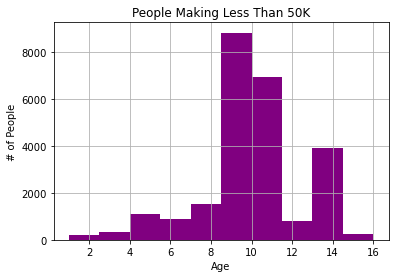

In [14]:
# Histogram of adults making les than 50k by age
no_money['education-num'].hist(color = 'purple')
plt.title('People Making Less Than 50K')
plt.xlabel('Age')
plt.ylabel('# of People')

# 5) Practice some other types of visualization with your choice of variables 

In [15]:
# Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship

job_money = adults[['occupation','income']]
hella_money = job_money[adults['income'] == '>50K'].groupby('occupation').count().sort_values(by = 'income')
not_hella_money = job_money[adults['income'] == '<=50K'].groupby('occupation').count().sort_values(by = 'income')



<AxesSubplot:title={'center':'Number of jobs that make under 50k'}, ylabel='occupation'>

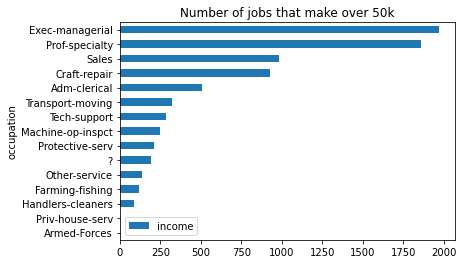

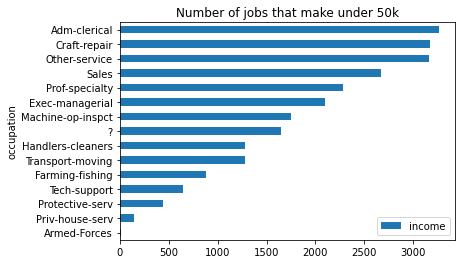

In [16]:
hella_money.plot.barh(title = 'Number of jobs that make over 50k')


not_hella_money.plot.barh(title = 'Number of jobs that make under 50k')

<AxesSubplot:title={'center':'Race vs Years of Education'}, xlabel='race'>

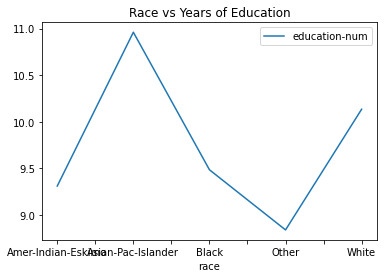

In [17]:
#Plot at least one line plot that shows a trend, where the x-axis variable manifests fully across the plot domain.

race_education_num = adults[['education-num', 'race']]
race_education_num = race_education_num.groupby('race').mean()
race_education_num.plot.line(title = 'Race vs Years of Education')


<AxesSubplot:title={'center':'Years of Education vs. Hours worked per week '}, xlabel='education-num', ylabel='hours-per-week'>

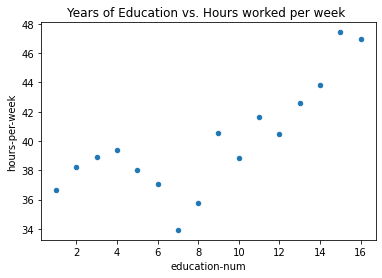

In [18]:
# Plot at least one scatter plot of the data that suggests a relationship between two discrete variables, 
# where the x-axis has an inter-related progression (amount, cost, process, etc.) but is not
# fully/evenly observed across the plot do

education_hours = adults[['education-num', 'hours-per-week']]
education_hours = education_hours.groupby('education-num').mean().reset_index()
education_hours.plot.scatter(title = 'Years of Education vs. Hours worked per week ', x = 'education-num', y = 'hours-per-week')

Text(0.5, 1.0, 'Average Financial Weight per Age')

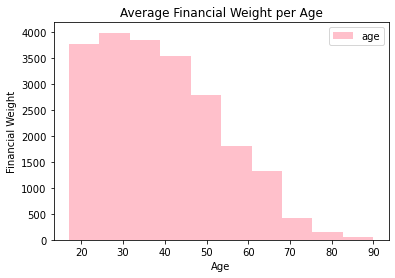

In [19]:
# Plot a histogram of a quantity that varies across the x-axis domain, but where we would like to
# consider a general distribution, rather than individual observations.

age_wgt = adults[['age', 'fnlwgt']]
age_wgt = age_wgt.groupby('fnlwgt').mean()
age_wgt.plot.hist(color = 'pink')
plt.xlabel('Age')
plt.ylabel('Financial Weight')
plt.title('Average Financial Weight per Age')

# 6) Using pivoting, plotting, sorting, etc., attempt to answer the following questions with the data. Record your responses, with clearly written text and visual examples, in your notebook. Clearly explain any decisions or assumptions you had to make to answer each. Be sure to consider counter-arguments to your conclusions and address them in your responses

a)What is the relationship between between gender and whether a person makes more than $50k?



<AxesSubplot:title={'center':'Making less than 50k'}, xlabel='sex'>

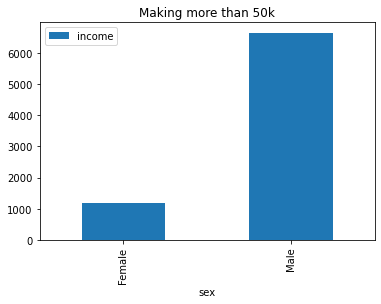

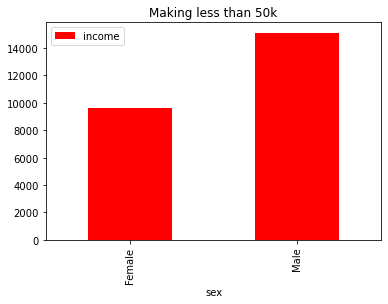

In [20]:
male_female = adults[['sex','income']]
money_maker = male_female[male_female['income'] == '>50K'].groupby('sex').count()
less_money = male_female[male_female['income'] == '<=50K'].groupby('sex').count()


money_maker.plot.bar(title = 'Making more than 50k')
less_money.plot.bar(title = 'Making less than 50k' , color = 'red')

Based on the given set of data we can see that a much larger portion of men make more than 50k than women. Even though there is more men that make less than 50k we can see that there is a much larger portion of women that make less than 50k than women that make more than 50k. This can be the result of having more men in the data set than women. Since the amount of men in the data set outweigh the women it can cause the data to be more biased to men. Which we can see by the having a lot more men making both more and less than 50k than women.

b) When a person makes more than $50, what is the relationship between gender and occupation?
What about for less?


<AxesSubplot:title={'center':'Lower Class Gender vs. Occupation'}, xlabel='occupation'>

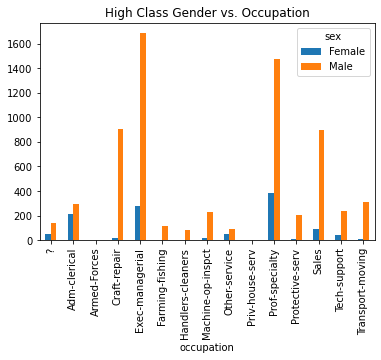

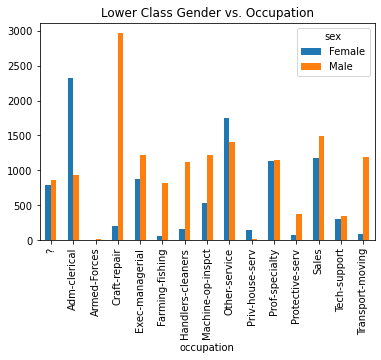

In [21]:
sex_occupation_income = adults[['sex', 'occupation', 'income']]

moreMoney = sex_occupation_income[sex_occupation_income['income'] == '>50K'].groupby(['sex', 'occupation']).count().reset_index()
moreMoney = moreMoney.pivot(index = 'occupation', columns = 'sex' , values = 'income')
moreMoney.plot.bar(title = 'High Class Gender vs. Occupation')

lessMoney = sex_occupation_income[sex_occupation_income['income'] == '<=50K'].groupby(['sex', 'occupation']).count().reset_index()
lessMoney = lessMoney.pivot(index = 'occupation' , columns = 'sex' , values = 'income')
lessMoney.plot.bar(title = 'Lower Class Gender vs. Occupation')


Once again based on the data we can see that men dominate both sets. There is very little women making more than 50k but much more making less than 50k. This seems to be the same trend even if we take away the variable of occupation. This could be the result of many different things. It could the gender pay gap our country has in which men make more than women, or it could simply be that this data set has much more men than women.

c) What are the “richest” professions in each possible native country?

In [22]:
rich_country = adults[['income', 'occupation', 'native-country']]
rich_country = rich_country[rich_country['income'] == '>50K']
rich_country = rich_country.groupby(['occupation', 'native-country']).count().reset_index().groupby('native-country').max()

rich_country

,occupation,income
native-country,,
?,Transport-moving,48
Cambodia,Sales,2
Canada,Transport-moving,8
China,Tech-support,11
Columbia,Tech-support,1
Cuba,Transport-moving,7
Dominican-Republic,Sales,1
Ecuador,Transport-moving,1
El-Salvador,Sales,3


Given this data we can see the occupation in each country and the number of people who make over 50k in that occupation. This data isn't the best representation to answer the "richest" profession in each country. I say this because most countries only have 1 person making over 50k. This could be because there are only a very few number of people from each country in the data set. As we can see this data shows that there is 1818 people from the United States that make over 50k, which would make sense because most people in this data set are from the United States.

d) What is the relationship between race and level of education? Does it further seem to relate to
whether a person makes more than $50k?

In [44]:
race_edu = adults[['race', 'education-num','income']]


race_vs_edu = race_edu.groupby('race').mean()
race_vs_edu




,education-num
race,
Amer-Indian-Eskimo,9.311897
Asian-Pac-Islander,10.960539
Black,9.486236
Other,8.841328
White,10.135246


In [50]:
higher_income = race_edu[race_edu['income'] == '>50K'].groupby(['race', 'education-num']).count()
higher_income

income
race               education-num        
Amer-Indian-Eskimo 7                   2
                   9                  11
                   10                  6
                   11                  1
                   12                  1
                   13                  8
                   14                  3
                   15                  2
                   16                  2
Asian-Pac-Islander 3                   3
                   5                   1
                   6                   1
                   7                   1
                   8                   1
                   9                  34
                   10                 33
                   11                  9
                   12                  8
                   13                 97
                   14                 43
                   15                 27
                   16                 18
Black              2                   1
                   4                   2
                   5                   4
                   6                   6
                   7                   7
                   8                   5
                   9                  86
                   10                 86
                   11                 18
                   12                 19
                   13                 96
                   14                 40
                   15                  8
                   16                  9
Other              3                   1
                   6                   1
                   9                   2
                   10                  7
                   12                  2
                   13                  5
                   14                  2
                   15                  4
                   16                  1
White              2                   5
                   3                  12
                   4                  38
                   5                  22
                   6                  54
                   7                  50
                   8                  27
                   9                1542
                   10               1255
                   11                333
                   12                235
                   13               2015
                   14                871
                   15                382
                   16                276

Having a higher education doesn't seem to make a big difference between any race. It seems that more people make over 50k when they went to school for 10-12 years. People who went to school longer seem to make less but that could be because our data set doesnt have many people that went to college. You can tell that some races don't have as many people past High School than other races. Yet again this could be larger because most of the people in this data set are white.